In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tflearn.data_utils as du
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
X_train = pd.read_csv('csvTrainImages 13440x1024.csv', header = None).to_numpy()
y_train = pd.read_csv('csvTrainLabel 13440x1.csv', header = None).to_numpy()-1
X_test = pd.read_csv('csvTestImages 3360x1024.csv', header = None).to_numpy()
y_test = pd.read_csv('csvTestLabel 3360x1.csv', header = None).to_numpy()-1

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13440, 1024), (13440, 1), (3360, 1024), (3360, 1))

In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)
X_train.shape, X_test.shape

((13440, 32, 32, 1), (3360, 32, 32, 1))

In [6]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  28
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


In [7]:
y_train = du.to_categorical(y_train, nClasses)
y_test = du.to_categorical(y_test, nClasses)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=52)

In [9]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((10752, 32, 32, 1), (2688, 32, 32, 1), (10752, 28), (2688, 28))

In [27]:
alpha = [0.0001, 0.001, 0.1, 1, 10, 100]
batch_size = 64
epochs = 5
num_classes = nClasses
kernel_regularizer =tf.keras.regularizers.l2( l=i)

0.0001
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 9s 864us/sample - loss: 1.7844 - acc: 0.4488 - val_loss: 0.8648 - val_acc: 0.7080
Epoch 2/5
10752/10752 [==============================] - 10s 923us/sample - loss: 0.6428 - acc: 0.7848 - val_loss: 0.4901 - val_acc: 0.8318
Epoch 3/5
10752/10752 [==============================] - 10s 923us/sample - loss: 0.3841 - acc: 0.8728 - val_loss: 0.4158 - val_acc: 0.8627
Epoch 4/5
10752/10752 [==============================] - 10s 940us/sample - loss: 0.2854 - acc: 0.9036 - val_loss: 0.2981 - val_acc: 0.8981
Epoch 5/5
10752/10752 [==============================] - 10s 908us/sample - loss: 0.2172 - acc: 0.9296 - val_loss: 0.2860 - val_acc: 0.9022


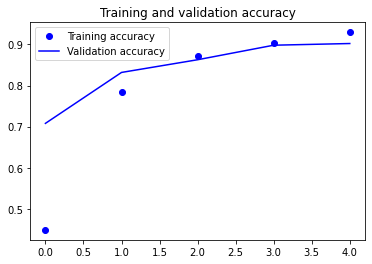

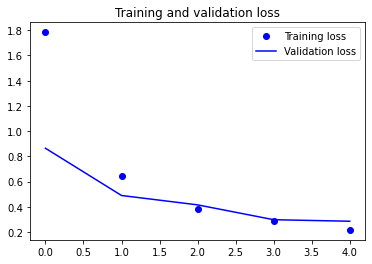

0.001
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 10s 932us/sample - loss: 1.7182 - acc: 0.4761 - val_loss: 0.8237 - val_acc: 0.7318
Epoch 2/5
10752/10752 [==============================] - 10s 902us/sample - loss: 0.5803 - acc: 0.8089 - val_loss: 0.4199 - val_acc: 0.8557
Epoch 3/5
10752/10752 [==============================] - 9s 882us/sample - loss: 0.3486 - acc: 0.8808 - val_loss: 0.3368 - val_acc: 0.8761
Epoch 4/5
10752/10752 [==============================] - 10s 893us/sample - loss: 0.2370 - acc: 0.9192 - val_loss: 0.2898 - val_acc: 0.9010
Epoch 5/5
10752/10752 [==============================] - 9s 875us/sample - loss: 0.1772 - acc: 0.9412 - val_loss: 0.2558 - val_acc: 0.9170


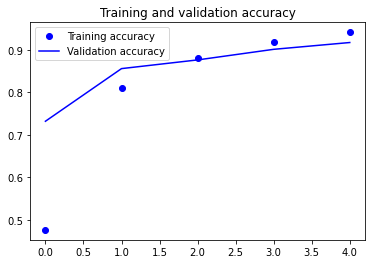

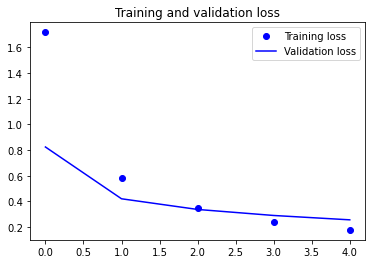

0.1
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 10s 955us/sample - loss: 1.6781 - acc: 0.4877 - val_loss: 0.7522 - val_acc: 0.7496
Epoch 2/5
10752/10752 [==============================] - 9s 850us/sample - loss: 0.5859 - acc: 0.8036 - val_loss: 0.4957 - val_acc: 0.8300
Epoch 3/5
10752/10752 [==============================] - 10s 901us/sample - loss: 0.3633 - acc: 0.8770 - val_loss: 0.4103 - val_acc: 0.8642
Epoch 4/5
10752/10752 [==============================] - 10s 895us/sample - loss: 0.2445 - acc: 0.9188 - val_loss: 0.3039 - val_acc: 0.8914
Epoch 5/5
10752/10752 [==============================] - 9s 879us/sample - loss: 0.1847 - acc: 0.9368 - val_loss: 0.4404 - val_acc: 0.8653


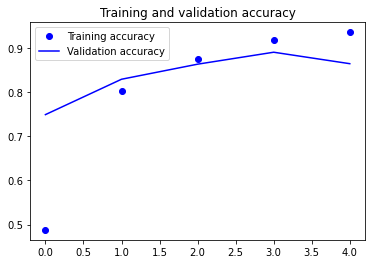

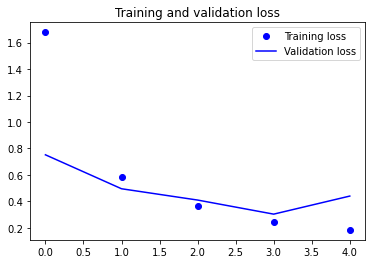

1
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 10s 964us/sample - loss: 1.4591 - acc: 0.5579 - val_loss: 0.6045 - val_acc: 0.8013
Epoch 2/5
10752/10752 [==============================] - 9s 845us/sample - loss: 0.4951 - acc: 0.8342 - val_loss: 0.4387 - val_acc: 0.8642
Epoch 3/5
10752/10752 [==============================] - 9s 868us/sample - loss: 0.2999 - acc: 0.9019 - val_loss: 0.3936 - val_acc: 0.8605
Epoch 4/5
10752/10752 [==============================] - 9s 874us/sample - loss: 0.2145 - acc: 0.9280 - val_loss: 0.3408 - val_acc: 0.8847
Epoch 5/5
10752/10752 [==============================] - 9s 853us/sample - loss: 0.1568 - acc: 0.9453 - val_loss: 0.2962 - val_acc: 0.9036


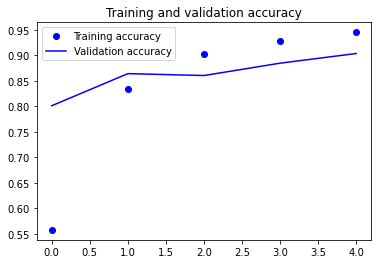

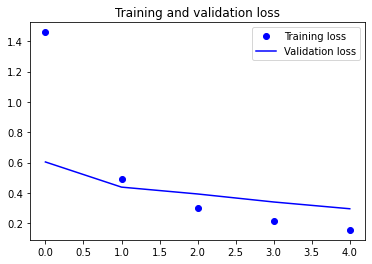

10
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 10s 935us/sample - loss: 2.9435 - acc: 0.3307 - val_loss: 1.5315 - val_acc: 0.5134
Epoch 2/5
10752/10752 [==============================] - 10s 899us/sample - loss: 1.1682 - acc: 0.6284 - val_loss: 1.1091 - val_acc: 0.6384
Epoch 3/5
10752/10752 [==============================] - 10s 933us/sample - loss: 0.7898 - acc: 0.7405 - val_loss: 0.8104 - val_acc: 0.7347
Epoch 4/5
10752/10752 [==============================] - 10s 928us/sample - loss: 0.5751 - acc: 0.8039 - val_loss: 0.7560 - val_acc: 0.7653
Epoch 5/5
10752/10752 [==============================] - 10s 888us/sample - loss: 0.4611 - acc: 0.8436 - val_loss: 0.7162 - val_acc: 0.7857


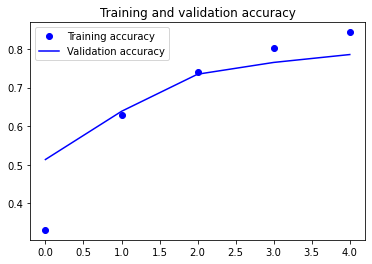

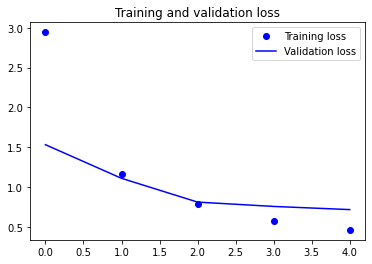

100
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 11s 994us/sample - loss: 3334.2398 - acc: 0.1023 - val_loss: 43.5160 - val_acc: 0.1306
Epoch 2/5
10752/10752 [==============================] - 10s 928us/sample - loss: 29.2773 - acc: 0.1591 - val_loss: 24.9902 - val_acc: 0.1469
Epoch 3/5
10752/10752 [==============================] - 9s 870us/sample - loss: 18.5910 - acc: 0.1852 - val_loss: 18.0085 - val_acc: 0.1749
Epoch 4/5
10752/10752 [==============================] - 9s 878us/sample - loss: 13.8708 - acc: 0.2128 - val_loss: 14.8264 - val_acc: 0.1994
Epoch 5/5
10752/10752 [==============================] - 10s 922us/sample - loss: 11.3865 - acc: 0.2407 - val_loss: 12.7151 - val_acc: 0.2013


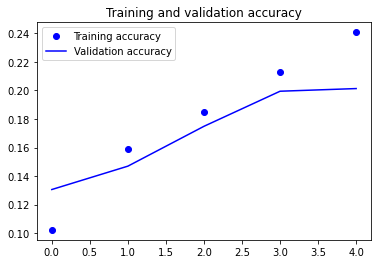

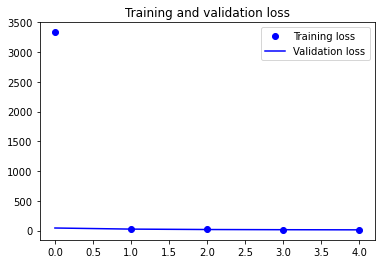

In [49]:
alpha = [0.0001, 0.001, 0.1, 1, 10, 100]
lst = []
i=0
for elem in range(len(alpha)):
    print(alpha[elem])
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
    model.add(LeakyReLU(alpha=alpha[elem]))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=alpha[elem]))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=alpha[elem]))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=alpha[elem]))                  
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

    model.save("model_train.h5py")

    accuracy = model_train.history['acc']
    val_accuracy = model_train.history['val_acc']
    loss = model_train.history['loss']
    val_loss = model_train.history['val_loss']
    epochs = list(range(len(accuracy)))
    lst.append((val_accuracy[-1], act[i]))
    i += 1
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
print(lst)

tanh
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 1.5498 - acc: 0.5299 - val_loss: 0.7425 - val_acc: 0.7816
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.5591 - acc: 0.8373 - val_loss: 0.4471 - val_acc: 0.8631
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.3327 - acc: 0.9055 - val_loss: 0.3339 - val_acc: 0.8962
Epoch 4/5
10752/10752 [==============================] - 10s 950us/sample - loss: 0.2105 - acc: 0.9450 - val_loss: 0.3024 - val_acc: 0.8999
Epoch 5/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.1498 - acc: 0.9614 - val_loss: 0.2623 - val_acc: 0.9163


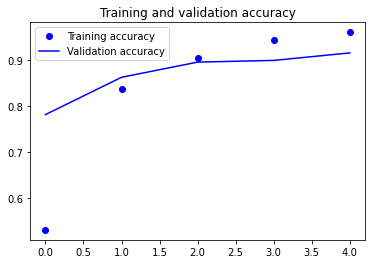

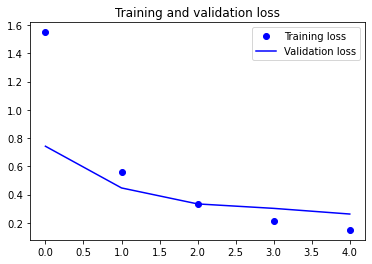

sigmoid
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 13s 1ms/sample - loss: 3.3614 - acc: 0.0353 - val_loss: 3.3472 - val_acc: 0.0387
Epoch 2/5
10752/10752 [==============================] - 11s 993us/sample - loss: 3.3448 - acc: 0.0350 - val_loss: 3.3411 - val_acc: 0.0346
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.3441 - acc: 0.0354 - val_loss: 3.3381 - val_acc: 0.0320
Epoch 4/5
10752/10752 [==============================] - 10s 924us/sample - loss: 3.3439 - acc: 0.0354 - val_loss: 3.3373 - val_acc: 0.0387
Epoch 5/5
10752/10752 [==============================] - 10s 939us/sample - loss: 3.3435 - acc: 0.0338 - val_loss: 3.3509 - val_acc: 0.0342


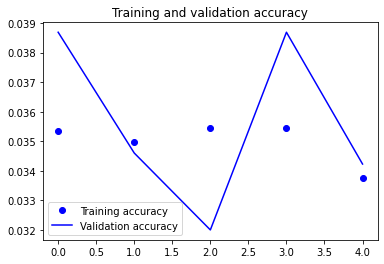

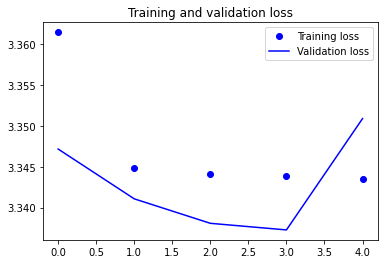

relu
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 1.7771 - acc: 0.4531 - val_loss: 0.8877 - val_acc: 0.7050
Epoch 2/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.6402 - acc: 0.7875 - val_loss: 0.5474 - val_acc: 0.8170
Epoch 3/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.3793 - acc: 0.8751 - val_loss: 0.4112 - val_acc: 0.8624
Epoch 4/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 0.2674 - acc: 0.9090 - val_loss: 0.3063 - val_acc: 0.8943
Epoch 5/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 0.1939 - acc: 0.9369 - val_loss: 0.3294 - val_acc: 0.8906


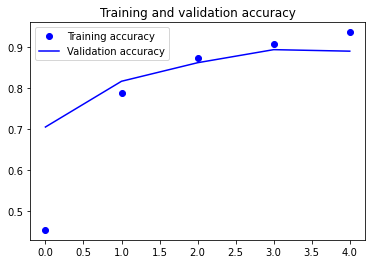

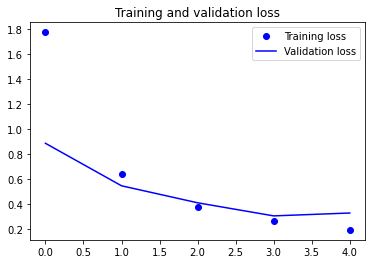

linear
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.5077 - acc: 0.5392 - val_loss: 0.6978 - val_acc: 0.7682
Epoch 2/5
10752/10752 [==============================] - 10s 925us/sample - loss: 0.5178 - acc: 0.8324 - val_loss: 0.4248 - val_acc: 0.8516
Epoch 3/5
10752/10752 [==============================] - 10s 959us/sample - loss: 0.3163 - acc: 0.8943 - val_loss: 0.4019 - val_acc: 0.8679
Epoch 4/5
10752/10752 [==============================] - 10s 907us/sample - loss: 0.2198 - acc: 0.9259 - val_loss: 0.3589 - val_acc: 0.8802
Epoch 5/5
10752/10752 [==============================] - 10s 942us/sample - loss: 0.1653 - acc: 0.9449 - val_loss: 0.3431 - val_acc: 0.8917


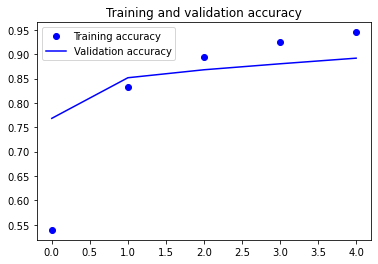

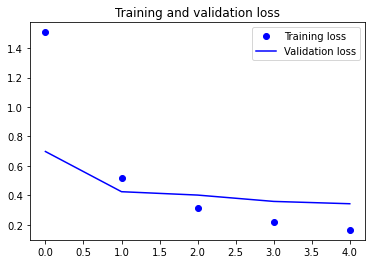

[(0.9162946343421936, 'tanh'), (0.0342261902987957, 'sigmoid'), (0.890625, 'relu'), (0.8917410969734192, 'linear')]


In [61]:
act = ['tanh', 'sigmoid', 'relu', 'linear']
lst = []
i=0
for elem in range(len(act)):
    print(act[elem])
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation=act[elem],input_shape=(32,32,1),padding='same'))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Conv2D(64, (3, 3), activation=act[elem],padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation=act[elem],padding='same'))                 
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation=act[elem]))              
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

    model.save("model_train.h5py")

    accuracy = model_train.history['acc']
    val_accuracy = model_train.history['val_acc']
    loss = model_train.history['loss']
    val_loss = model_train.history['val_loss']
    epochs = list(range(len(accuracy)))
    lst.append((val_accuracy[-1], act[i]))
    i += 1
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

print(lst)

0.0001
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 10s 906us/sample - loss: 1.5015 - acc: 0.5466 - val_loss: 0.6592 - val_acc: 0.7883
Epoch 2/5
10752/10752 [==============================] - 9s 793us/sample - loss: 0.5400 - acc: 0.8299 - val_loss: 0.4644 - val_acc: 0.8642
Epoch 3/5
10752/10752 [==============================] - 10s 954us/sample - loss: 0.3305 - acc: 0.9030 - val_loss: 0.3633 - val_acc: 0.8884
Epoch 4/5
10752/10752 [==============================] - 11s 988us/sample - loss: 0.2324 - acc: 0.9300 - val_loss: 0.3079 - val_acc: 0.9092
Epoch 5/5
10752/10752 [==============================] - 10s 928us/sample - loss: 0.1762 - acc: 0.9498 - val_loss: 0.3148 - val_acc: 0.9089


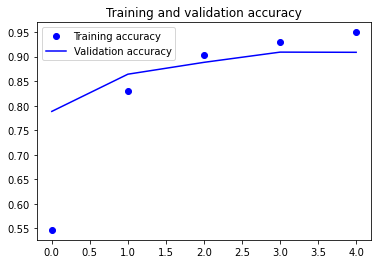

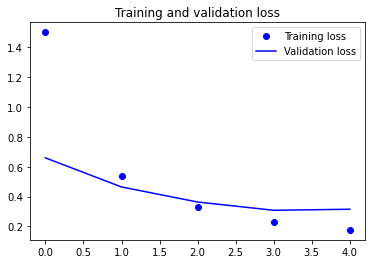

0.001
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 1.6379 - acc: 0.5407 - val_loss: 0.7939 - val_acc: 0.7924
Epoch 2/5
10752/10752 [==============================] - 10s 949us/sample - loss: 0.6827 - acc: 0.8256 - val_loss: 0.5688 - val_acc: 0.8579
Epoch 3/5
10752/10752 [==============================] - 9s 861us/sample - loss: 0.4880 - acc: 0.8894 - val_loss: 0.5179 - val_acc: 0.8776
Epoch 4/5
10752/10752 [==============================] - 10s 890us/sample - loss: 0.4040 - acc: 0.9121 - val_loss: 0.4838 - val_acc: 0.8869
Epoch 5/5
10752/10752 [==============================] - 10s 887us/sample - loss: 0.3262 - acc: 0.9370 - val_loss: 0.4586 - val_acc: 0.8895


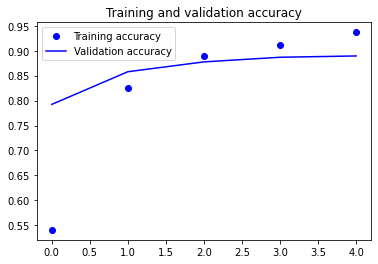

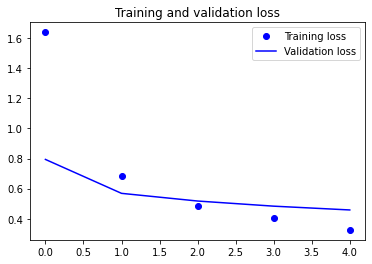

0.1
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 11s 1ms/sample - loss: 3.7839 - acc: 0.3399 - val_loss: 1.7656 - val_acc: 0.5290
Epoch 2/5
10752/10752 [==============================] - 9s 823us/sample - loss: 1.5261 - acc: 0.6048 - val_loss: 1.2764 - val_acc: 0.6696
Epoch 3/5
10752/10752 [==============================] - 10s 884us/sample - loss: 1.2187 - acc: 0.6973 - val_loss: 1.1434 - val_acc: 0.7061
Epoch 4/5
10752/10752 [==============================] - 8s 783us/sample - loss: 1.0384 - acc: 0.7527 - val_loss: 1.0202 - val_acc: 0.7385
Epoch 5/5
10752/10752 [==============================] - 9s 795us/sample - loss: 0.9633 - acc: 0.7689 - val_loss: 0.9229 - val_acc: 0.8002


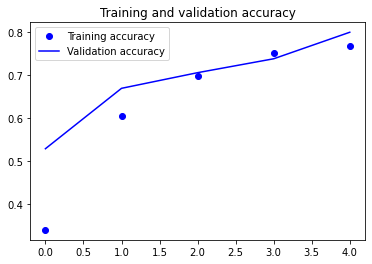

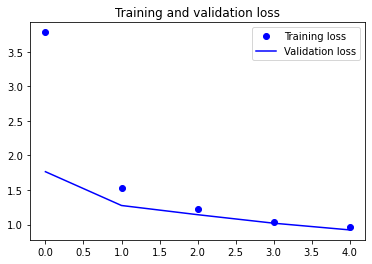

1
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 9s 881us/sample - loss: 17.0323 - acc: 0.2615 - val_loss: 2.1996 - val_acc: 0.3891
Epoch 2/5
10752/10752 [==============================] - 9s 857us/sample - loss: 2.1041 - acc: 0.4175 - val_loss: 1.9237 - val_acc: 0.4732
Epoch 3/5
10752/10752 [==============================] - 9s 837us/sample - loss: 1.9090 - acc: 0.4733 - val_loss: 1.7878 - val_acc: 0.5000
Epoch 4/5
10752/10752 [==============================] - 9s 828us/sample - loss: 1.7555 - acc: 0.5259 - val_loss: 1.6527 - val_acc: 0.5517
Epoch 5/5
10752/10752 [==============================] - 9s 802us/sample - loss: 1.6363 - acc: 0.5620 - val_loss: 1.5589 - val_acc: 0.5893


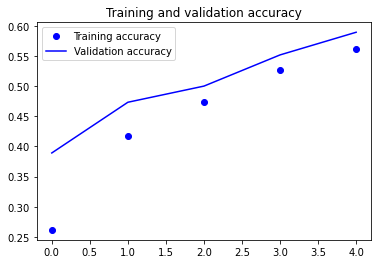

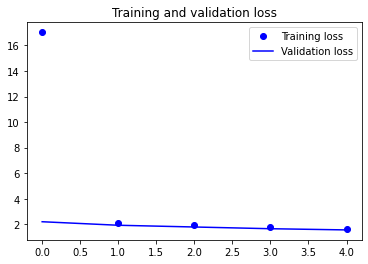

10
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 11s 979us/sample - loss: 147.1340 - acc: 0.0928 - val_loss: 3.3431 - val_acc: 0.0353
Epoch 2/5
10752/10752 [==============================] - 10s 934us/sample - loss: 3.3355 - acc: 0.0333 - val_loss: 3.3355 - val_acc: 0.0290
Epoch 3/5
10752/10752 [==============================] - 9s 871us/sample - loss: 3.3348 - acc: 0.0338 - val_loss: 3.3351 - val_acc: 0.0387
Epoch 4/5
10752/10752 [==============================] - 9s 833us/sample - loss: 3.3344 - acc: 0.0349 - val_loss: 3.3337 - val_acc: 0.0335
Epoch 5/5
10752/10752 [==============================] - 10s 923us/sample - loss: 3.3344 - acc: 0.0331 - val_loss: 3.3344 - val_acc: 0.0320


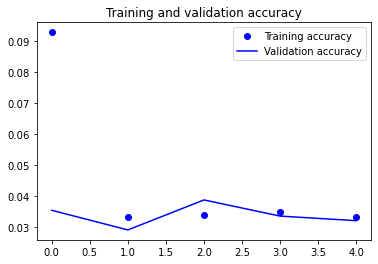

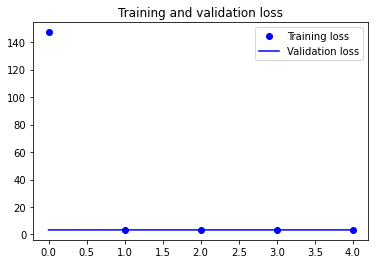

100
Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 11s 998us/sample - loss: 1451.9484 - acc: 0.0725 - val_loss: 3.3876 - val_acc: 0.0394
Epoch 2/5
10752/10752 [==============================] - 10s 903us/sample - loss: 3.3372 - acc: 0.0382 - val_loss: 3.3344 - val_acc: 0.0342
Epoch 3/5
10752/10752 [==============================] - 10s 884us/sample - loss: 3.3341 - acc: 0.0349 - val_loss: 3.3354 - val_acc: 0.0298
Epoch 4/5
10752/10752 [==============================] - 9s 877us/sample - loss: 3.3346 - acc: 0.0333 - val_loss: 3.3349 - val_acc: 0.0320
Epoch 5/5
10752/10752 [==============================] - 9s 874us/sample - loss: 3.3340 - acc: 0.0354 - val_loss: 3.3345 - val_acc: 0.0335


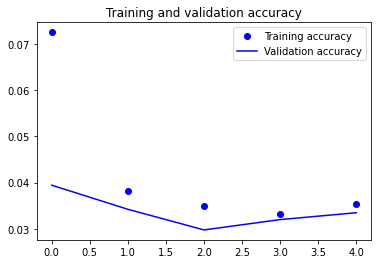

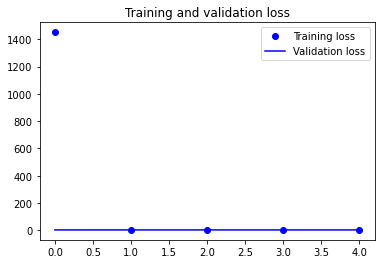

[(0.9088541865348816, 0.0001), (0.8895089030265808, 0.001), (0.8002232313156128, 0.1), (0.5892857313156128, 1), (0.0319940485060215, 10), (0.0334821417927742, 100)]


In [58]:
l2 = [0.0001, 0.001, 0.1, 1, 10, 100]
lst = []
i = 0
for elem in range(len(l2)):
    print(l2[elem])
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Conv2D(64, (3, 3), activation='linear',padding='same', kernel_regularizer =tf.keras.regularizers.l2( l=l2[elem])))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Conv2D(128, (3, 3), activation='linear',padding='same', kernel_regularizer =tf.keras.regularizers.l2( l=l2[elem])))                 
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='linear'))              
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

    model.save("model_train.h5py")

    accuracy = model_train.history['acc']
    val_accuracy = model_train.history['val_acc']
    loss = model_train.history['loss']
    val_loss = model_train.history['val_loss']
    lst.append((val_accuracy[-1], l2[i]))
    i += 1
    epochs = list(range(len(accuracy)))
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
print(lst)

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 8s 736us/sample - loss: 1.6967 - acc: 0.4801 - val_loss: 0.7792 - val_acc: 0.7403
Epoch 2/5
10752/10752 [==============================] - 8s 737us/sample - loss: 0.6131 - acc: 0.7997 - val_loss: 0.5005 - val_acc: 0.8304
Epoch 3/5
10752/10752 [==============================] - 8s 718us/sample - loss: 0.3847 - acc: 0.8736 - val_loss: 0.3844 - val_acc: 0.8724
Epoch 4/5
10752/10752 [==============================] - 8s 748us/sample - loss: 0.2801 - acc: 0.9092 - val_loss: 0.3577 - val_acc: 0.8798
Epoch 5/5
10752/10752 [==============================] - 8s 730us/sample - loss: 0.2091 - acc: 0.9285 - val_loss: 0.2853 - val_acc: 0.9077


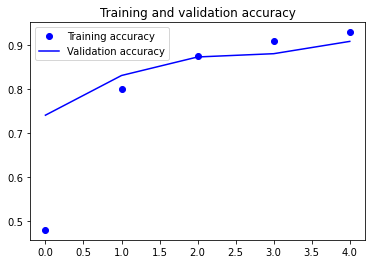

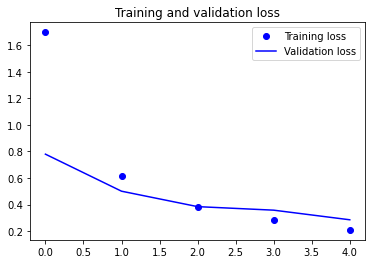

In [54]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))              
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 8s 715us/sample - loss: 1.8055 - acc: 0.4131 - val_loss: 0.9170 - val_acc: 0.6596
Epoch 2/5
10752/10752 [==============================] - 7s 636us/sample - loss: 0.7738 - acc: 0.7281 - val_loss: 0.6866 - val_acc: 0.7571
Epoch 3/5
10752/10752 [==============================] - 7s 609us/sample - loss: 0.5302 - acc: 0.8145 - val_loss: 0.4488 - val_acc: 0.8493
Epoch 4/5
10752/10752 [==============================] - 7s 635us/sample - loss: 0.3807 - acc: 0.8672 - val_loss: 0.4216 - val_acc: 0.8456
Epoch 5/5
10752/10752 [==============================] - 7s 619us/sample - loss: 0.2913 - acc: 0.8972 - val_loss: 0.3424 - val_acc: 0.8761


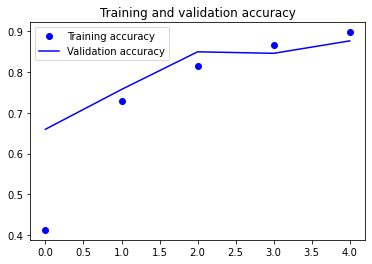

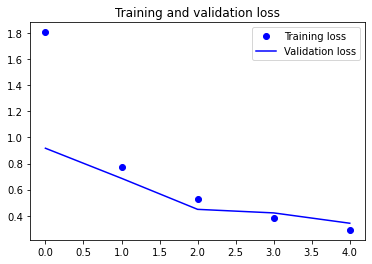

In [57]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))              
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 8s 721us/sample - loss: 1.9023 - acc: 0.3811 - val_loss: 1.2689 - val_acc: 0.5365
Epoch 2/5
10752/10752 [==============================] - 7s 634us/sample - loss: 0.7771 - acc: 0.7259 - val_loss: 0.5379 - val_acc: 0.8147
Epoch 3/5
10752/10752 [==============================] - 7s 610us/sample - loss: 0.4858 - acc: 0.8318 - val_loss: 0.5081 - val_acc: 0.8065
Epoch 4/5
10752/10752 [==============================] - 7s 616us/sample - loss: 0.3487 - acc: 0.8797 - val_loss: 0.3640 - val_acc: 0.8739
Epoch 5/5
10752/10752 [==============================] - 7s 634us/sample - loss: 0.2817 - acc: 0.9012 - val_loss: 0.3093 - val_acc: 0.8999


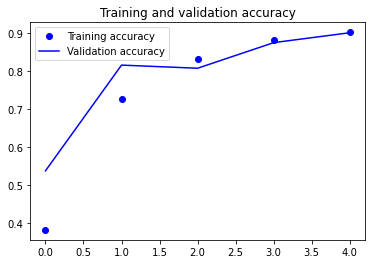

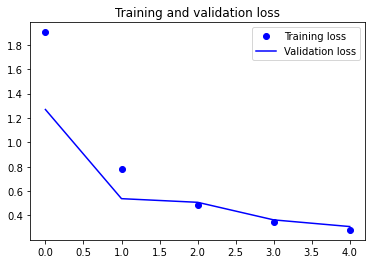

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))              
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Train on 10752 samples, validate on 2688 samples
Epoch 1/5
10752/10752 [==============================] - 12s 1ms/sample - loss: 2.0735 - acc: 0.3682 - val_loss: 1.0180 - val_acc: 0.6871
Epoch 2/5
10752/10752 [==============================] - 10s 933us/sample - loss: 1.0084 - acc: 0.6666 - val_loss: 0.5847 - val_acc: 0.8173
Epoch 3/5
10752/10752 [==============================] - 10s 904us/sample - loss: 0.7268 - acc: 0.7617 - val_loss: 0.4422 - val_acc: 0.8635
Epoch 4/5
10752/10752 [==============================] - 10s 961us/sample - loss: 0.5957 - acc: 0.8012 - val_loss: 0.3629 - val_acc: 0.8802
Epoch 5/5
10752/10752 [==============================] - 10s 929us/sample - loss: 0.5038 - acc: 0.8315 - val_loss: 0.3102 - val_acc: 0.9033


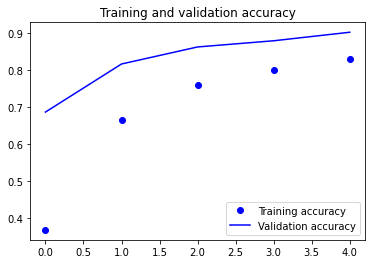

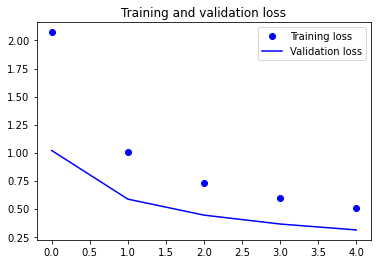

In [55]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,1),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))                 
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_val, y_val))

model.save("model_train.h5py")

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = list(range(len(accuracy)))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [14]:
model_train = model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, y_val))

Train on 10752 samples, validate on 2688 samples
Epoch 1/10
10688/10752 [============================>.] - ETA: 0s - loss: 1.6372 - acc: 0.4920

D:\anac\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


10752/10752 [==============================] - 8s 723us/sample - loss: 1.6339 - acc: 0.4931 - val_loss: 0.7681 - val_acc: 0.7340
Epoch 2/10
10752/10752 [==============================] - 9s 802us/sample - loss: 0.5770 - acc: 0.8085 - val_loss: 0.5088 - val_acc: 0.8263
Epoch 3/10
10752/10752 [==============================] - 7s 693us/sample - loss: 0.3482 - acc: 0.8814 - val_loss: 0.3678 - val_acc: 0.8724
Epoch 4/10
10752/10752 [==============================] - 8s 722us/sample - loss: 0.2322 - acc: 0.9195 - val_loss: 0.3374 - val_acc: 0.8869
Epoch 5/10
10752/10752 [==============================] - 8s 728us/sample - loss: 0.1781 - acc: 0.9409 - val_loss: 0.2642 - val_acc: 0.9107
Epoch 6/10
10752/10752 [==============================] - 9s 813us/sample - loss: 0.1273 - acc: 0.9558 - val_loss: 0.2690 - val_acc: 0.9118
Epoch 7/10
10752/10752 [==============================] - 8s 772us/sample - loss: 0.0920 - acc: 0.9687 - val_loss: 0.3284 - val_acc: 0.8955
Epoch 8/10
10752/10752 [=======

In [15]:
model.save("model_train.h5py")

In [16]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
y_true = np.argmax(y_test, axis = 1)

D:\anac\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [17]:
cm = confusion_matrix(y_true, predictions)

In [18]:
accuracy = sum(cm[i][i] for i in range(28)) / y_true.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9184523809523809


In [19]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00       120
     Class 1       0.99      0.92      0.95       120
     Class 2       0.91      0.88      0.89       120
     Class 3       0.88      0.88      0.88       120
     Class 4       0.95      0.93      0.94       120
     Class 5       0.82      0.96      0.88       120
     Class 6       0.93      0.89      0.91       120
     Class 7       0.97      0.87      0.92       120
     Class 8       0.84      0.92      0.88       120
     Class 9       0.96      0.94      0.95       120
    Class 10       0.92      0.93      0.92       120
    Class 11       0.98      0.82      0.89       120
    Class 12       0.94      0.97      0.95       120
    Class 13       0.87      0.95      0.91       120
    Class 14       0.95      0.88      0.92       120
    Class 15       0.96      0.96      0.96       120
    Class 16       0.93      0.94      0.94       120
    Class 17       0.96    

In [20]:
test_eval = model.evaluate(X_test, y_test, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.30800153455430906
Test accuracy: 0.9184524


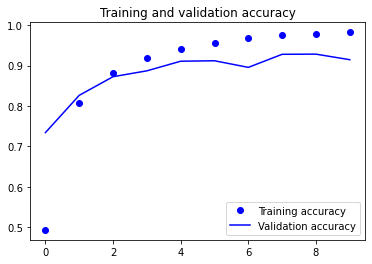

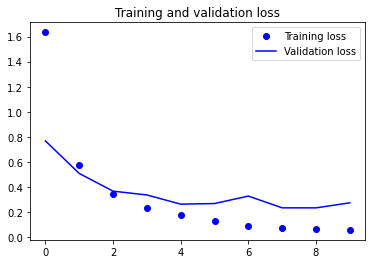

In [21]:
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()